In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from owi_data_2_pandas.io import API
import datetime
from pytz import utc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Import vub Meetenet Vlaamse Banken API functions
from vubmvbc.config import Credentials
from vubmvbc.client import Base
from vubmvbc.objects import Catalog, Data
import vubmvbc.data_getter as dg

from oma_tracking.oma_clustering import ModeClusterer  #pip install hdbscan --no-build-isolation --no-binary :all
from oma_tracking.data.make_dataset import DatasetGetter
from oma_tracking.data.utils import unpack_mode, get_frequencies

In [21]:
start  = datetime.datetime(2014,1,1,tzinfo=utc)
stop  = datetime.datetime(2023,7,19,tzinfo=utc)

location = 'bbc01'
name_location = 'BB_C01'

home_folder = "../../"
data_file_name = '_'.join([location, start.strftime("%Y%m%d"), stop.strftime("%Y%m%d")])
data_path = home_folder + "data/bb/raw/" + data_file_name + ".parquet"
data = pd.read_parquet(data_path)

SS1 = get_frequencies(data, 'SS1')
SS2 = get_frequencies(data, 'SS2')
FA1 = get_frequencies(data, 'FA1')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/bb/raw/bbc01_20140101_20230719.parquet'

In [22]:
data.columns

Index(['location', 'mpe_BB_C01_FA1', 'mpe_BB_C01_SS1', 'mpe_BB_C01_SS2',
       'mean_BB_C01_rpm', 'mean_BB_C01_yaw', 'mean_BB_C01_pitch',
       'mean_BB_C01_windspeed', 'mean_BB_C01_winddirection',
       'max_BB_C01_TW_ACC_LAT027_FA', 'max_BB_C01_TW_ACC_LAT027_SS',
       'max_BB_C01_TW_ACC_LAT041_FA', 'max_BB_C01_TW_ACC_LAT041_SS',
       'min_BB_C01_TW_ACC_LAT027_FA', 'min_BB_C01_TW_ACC_LAT027_SS',
       'min_BB_C01_TW_ACC_LAT041_FA', 'min_BB_C01_TW_ACC_LAT041_SS',
       'rms_BB_C01_TW_ACC_LAT027_FA', 'rms_BB_C01_TW_ACC_LAT027_SS',
       'rms_BB_C01_TW_ACC_LAT041_FA', 'rms_BB_C01_TW_ACC_LAT041_SS',
       'rms1p_BB_C01_TW_ACC_LAT041_FA', 'rms1p_BB_C01_TW_ACC_LAT041_SS',
       'max_BB_C01_TW_ACC_LAT027_DEG031_X_nr1',
       'max_BB_C01_TW_ACC_LAT041_DEG031_X_nr1',
       'min_BB_C01_TW_ACC_LAT027_DEG031_X_nr1',
       'min_BB_C01_TW_ACC_LAT041_DEG031_X_nr1',
       'rms_BB_C01_TW_ACC_LAT027_DEG031_X_nr1',
       'rms_BB_C01_TW_ACC_LAT041_DEG031_X_nr1', 'mpe_BB_C01_FA2',
       

In [23]:
data.filter(regex='mean')

,mean_BB_C01_rpm,mean_BB_C01_yaw,mean_BB_C01_pitch,mean_BB_C01_windspeed,mean_BB_C01_winddirection,mean_BB_C01_power
timestamp,,,,,,
2015-01-01 00:00:00+00:00,15.9,215.600006,-2.4,10.4,214.699997,NaN
2015-01-01 00:10:00+00:00,15.9,210.899994,-2.3,10.6,209.800003,1896.000000
2015-01-01 00:20:00+00:00,15.9,210.000000,-2.2,10.7,211.800003,1968.000000
2015-01-01 00:30:00+00:00,16.0,214.399994,-2.0,11.1,216.000000,2160.000000
2015-01-01 00:40:00+00:00,16.0,217.600006,-1.7,11.4,217.699997,2160.000000
...,...,...,...,...,...,...
2023-07-18 23:20:00+00:00,10.0,211.500000,-1.4,4.6,217.199997,107.900002
2023-07-18 23:30:00+00:00,10.0,221.399994,-1.5,4.6,219.000000,118.000000
2023-07-18 23:40:00+00:00,10.0,218.399994,-1.1,4.4,215.600006,75.800003


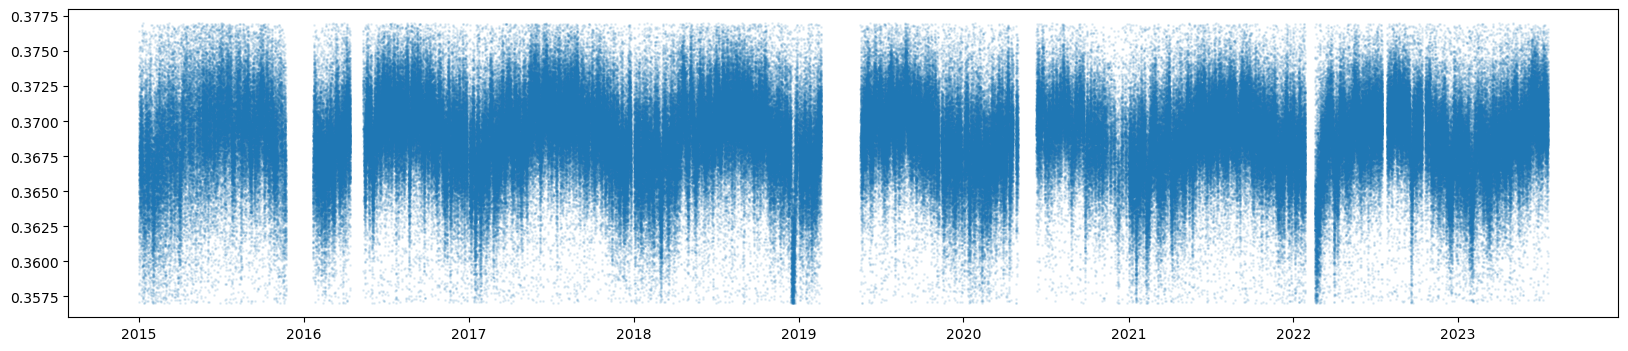

In [24]:
plt.figure(figsize = (20,4))
plt.scatter(SS1.index, SS1, s=1, alpha=0.1)
plt.show()

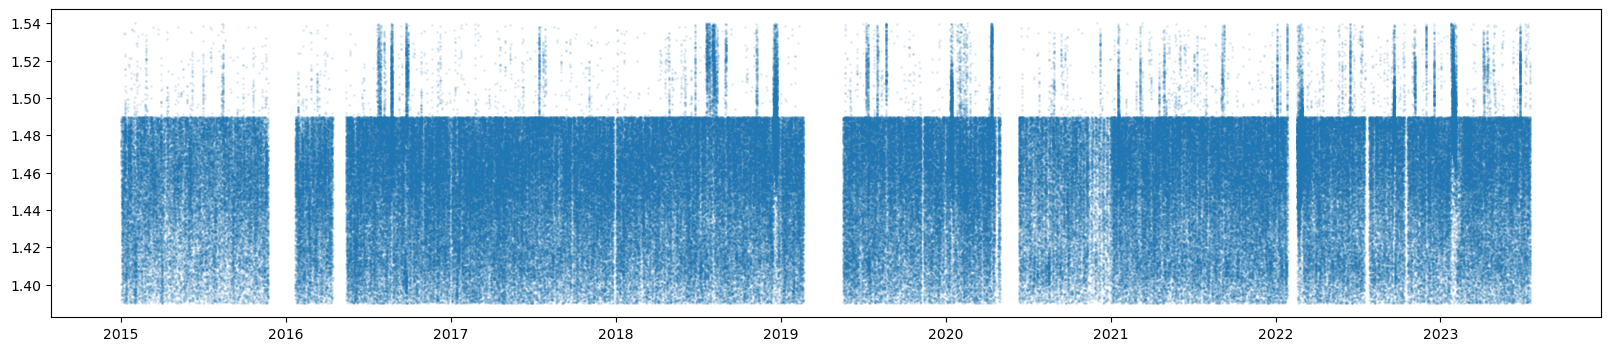

In [25]:
plt.figure(figsize = (20,4))
plt.scatter(SS2.index, SS2, s=1, alpha=0.1)
plt.show()

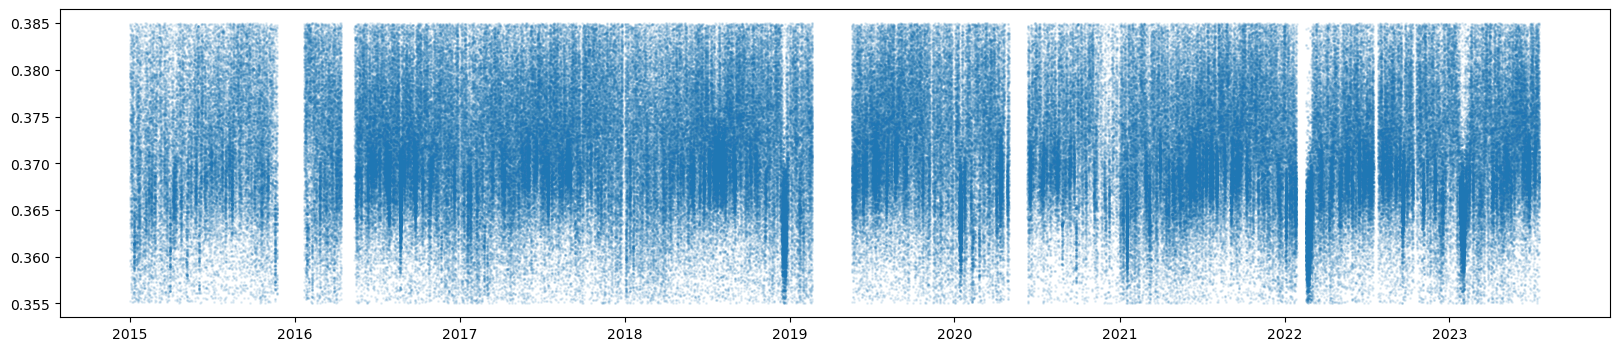

In [26]:
plt.figure(figsize = (20,4))
plt.scatter(FA1.index, FA1, s=1, alpha=0.1)
plt.show()